In [8]:
## 1. 라이브러리 불러오기

import pickle
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler
import time

# 시각화 설정
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set(font_scale=1.2)

print("기본 라이브러리 로드 완료")

기본 라이브러리 로드 완료


In [9]:
## 2. 전처리된 데이터 로드

# 데이터 경로 설정
PROCESSED_DIR = "./data/processed"
TRUST_DIR = "./data/trust"

# 디렉토리 생성
os.makedirs(TRUST_DIR, exist_ok=True)

# 필요한 데이터 파일 로드
data_files = {
    'interaction_df': 'interaction_df.pkl',
    'train_df': 'train_df.pkl',
    'val_df': 'val_df.pkl',
    'test_df': 'test_df.pkl',
    'user_processed': 'user_processed.pkl',
    'business_processed': 'business_processed.pkl',
    'tip_processed': 'tip_processed.pkl'
}

# 데이터 로드
data = {}
for name, file in data_files.items():
    with open(os.path.join(PROCESSED_DIR, file), 'rb') as f:
        data[name] = pickle.load(f)
    print(f"{name} 로드 완료")

# 데이터 변수에 할당
interaction_df = data['interaction_df']
train_df = data['train_df']
val_df = data['val_df']
test_df = data['test_df']
user_processed = data['user_processed']
business_processed = data['business_processed']
tip_processed = data['tip_processed']

print(f"훈련 세트 크기: {len(train_df):,}")
print(f"사용자 수: {len(user_processed):,}")
print(f"비즈니스 수: {len(business_processed):,}")

interaction_df 로드 완료
train_df 로드 완료
val_df 로드 완료
test_df 로드 완료
user_processed 로드 완료
business_processed 로드 완료
tip_processed 로드 완료
훈련 세트 크기: 20,674
사용자 수: 430
비즈니스 수: 7,044



=== 사용자 활동 통계 ===
리뷰 수 통계:
count      430.000000
mean       506.313953
std        967.126709
min          4.000000
25%         97.500000
50%        286.000000
75%        571.250000
max      16567.000000
Name: review_count, dtype: float64

팬 수 통계:
count     430.000000
mean       57.016279
std       164.905206
min         0.000000
25%         3.000000
50%        17.000000
75%        45.000000
max      2086.000000
Name: fans, dtype: float64

평균 별점 통계:
count    430.000000
mean       3.901349
std        0.443490
min        1.930000
25%        3.672500
50%        3.930000
75%        4.187500
max        4.930000
Name: average_stars, dtype: float64

컴플리먼트 컬럼 (11개): ['compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']

총 컴플리먼트 통계:
count      430.000000
mean       542.144186
std       2310.471225
min          0.000000
25%         15

C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1852232619.py:57: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1852232619.py:57: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1852232619.py:57: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1852232619.py:57: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1852232619.py:57: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1852232619.py:57: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  plt.tight_layout()
C:\User

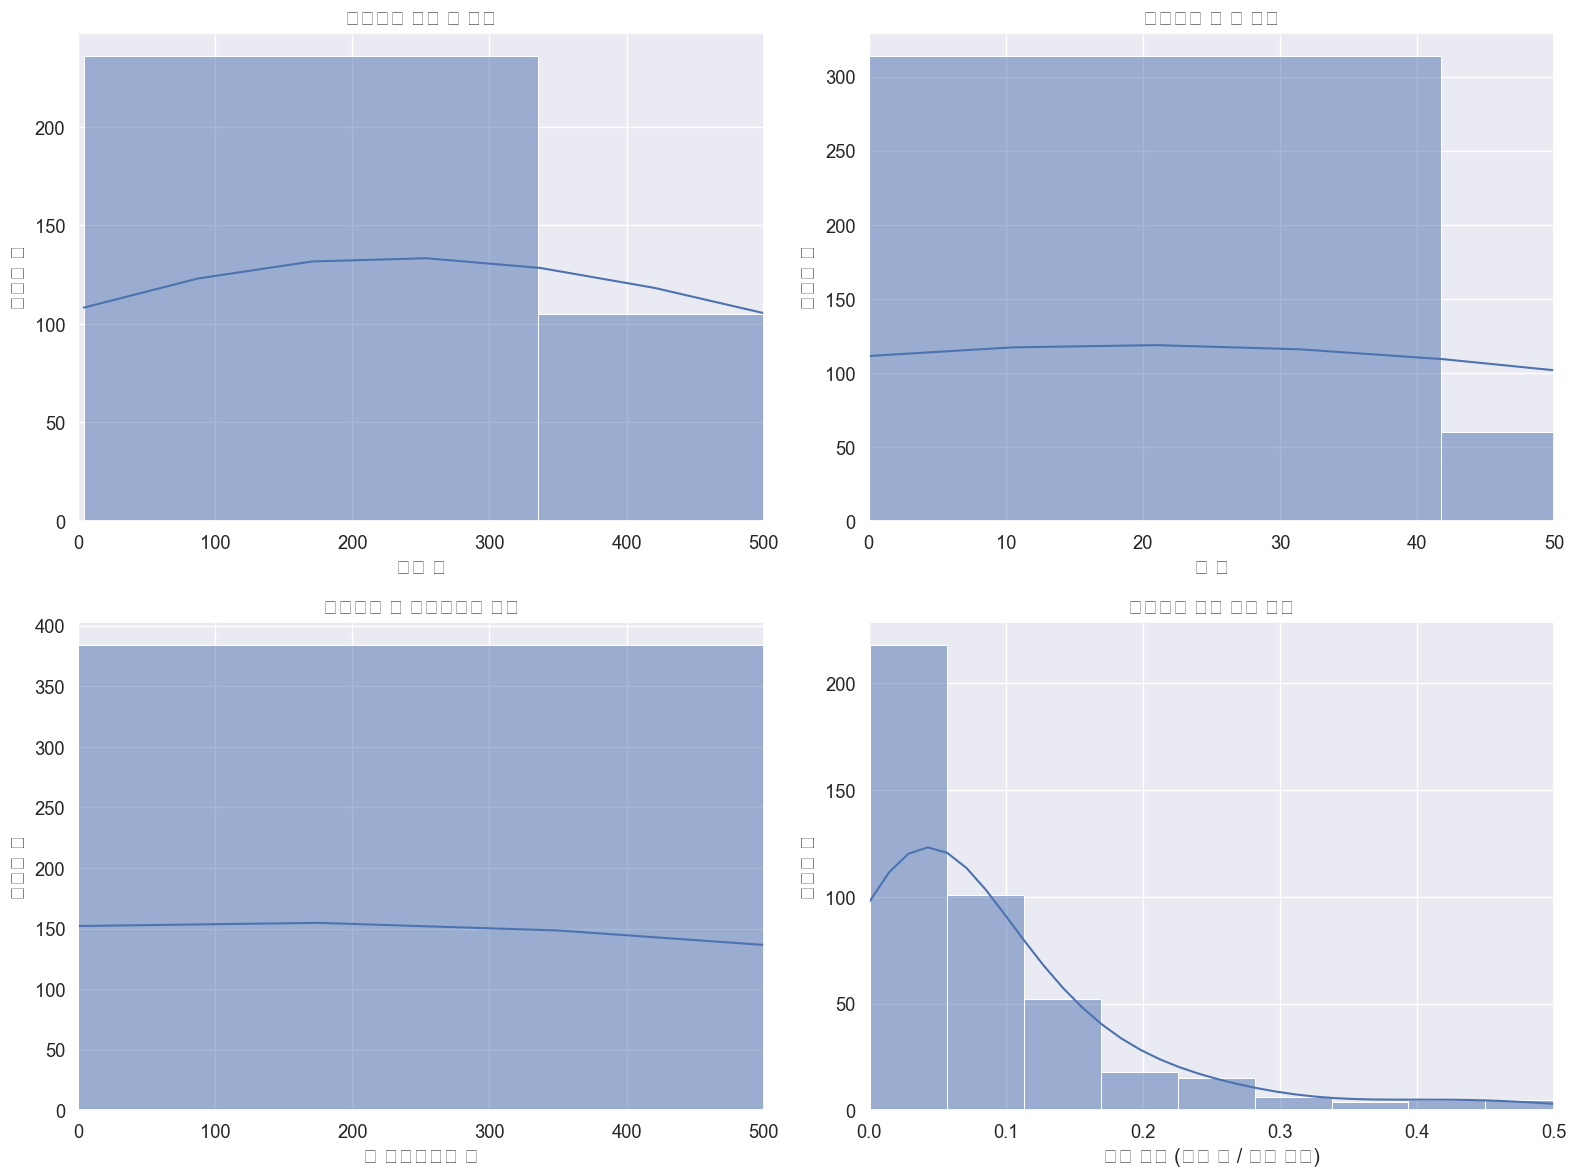

In [10]:
## 3. 기본 사용자 정보 탐색

# 사용자 활동 정보 기본 통계
print("\n=== 사용자 활동 통계 ===")
print("리뷰 수 통계:")
print(user_processed['review_count'].describe())

print("\n팬 수 통계:")
print(user_processed['fans'].describe())

print("\n평균 별점 통계:")
print(user_processed['average_stars'].describe())

# 컴플리먼트 관련 컬럼
compliment_cols = [col for col in user_processed.columns if 'compliment_' in col]
print(f"\n컴플리먼트 컬럼 ({len(compliment_cols)}개): {compliment_cols}")

# 총 컴플리먼트 통계
print("\n총 컴플리먼트 통계:")
print(user_processed['total_compliments'].describe())

# 활동 강도 통계
print("\n활동 강도 (리뷰 수 / 활동 기간) 통계:")
print(user_processed['activity_intensity'].describe())

# 히스토그램 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 리뷰 수 분포
sns.histplot(user_processed['review_count'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('사용자별 리뷰 수 분포')
axes[0, 0].set_xlabel('리뷰 수')
axes[0, 0].set_ylabel('사용자 수')
axes[0, 0].set_xlim(0, 500)  # 가독성을 위해 x축 제한

# 팬 수 분포
sns.histplot(user_processed['fans'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('사용자별 팬 수 분포')
axes[0, 1].set_xlabel('팬 수')
axes[0, 1].set_ylabel('사용자 수')
axes[0, 1].set_xlim(0, 50)  # 가독성을 위해 x축 제한

# 총 컴플리먼트 분포
sns.histplot(user_processed['total_compliments'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('사용자별 총 컴플리먼트 분포')
axes[1, 0].set_xlabel('총 컴플리먼트 수')
axes[1, 0].set_ylabel('사용자 수')
axes[1, 0].set_xlim(0, 500)  # 가독성을 위해 x축 제한

# 활동 강도 분포
sns.histplot(user_processed['activity_intensity'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('사용자별 활동 강도 분포')
axes[1, 1].set_xlabel('활동 강도 (리뷰 수 / 활동 기간)')
axes[1, 1].set_ylabel('사용자 수')
axes[1, 1].set_xlim(0, 0.5)  # 가독성을 위해 x축 제한

plt.tight_layout()
plt.show()


=== 리뷰 반응 통계 ===

Useful 통계:
count    26550.000000
mean         1.281356
std          2.191828
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         48.000000
Name: useful, dtype: float64

Funny 통계:
count    26550.000000
mean         0.470245
std          1.410667
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         39.000000
Name: funny, dtype: float64

Cool 통계:
count    26550.000000
mean         0.649718
std          1.517266
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         49.000000
Name: cool, dtype: float64


c:\Users\PYJ\anaconda3\envs\lab\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PYJ\anaconda3\envs\lab\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PYJ\anaconda3\envs\lab\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PYJ\anaconda3\envs\lab\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PYJ\anaconda3\envs\lab\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) Arial.
  fig.canvas.print_figure(

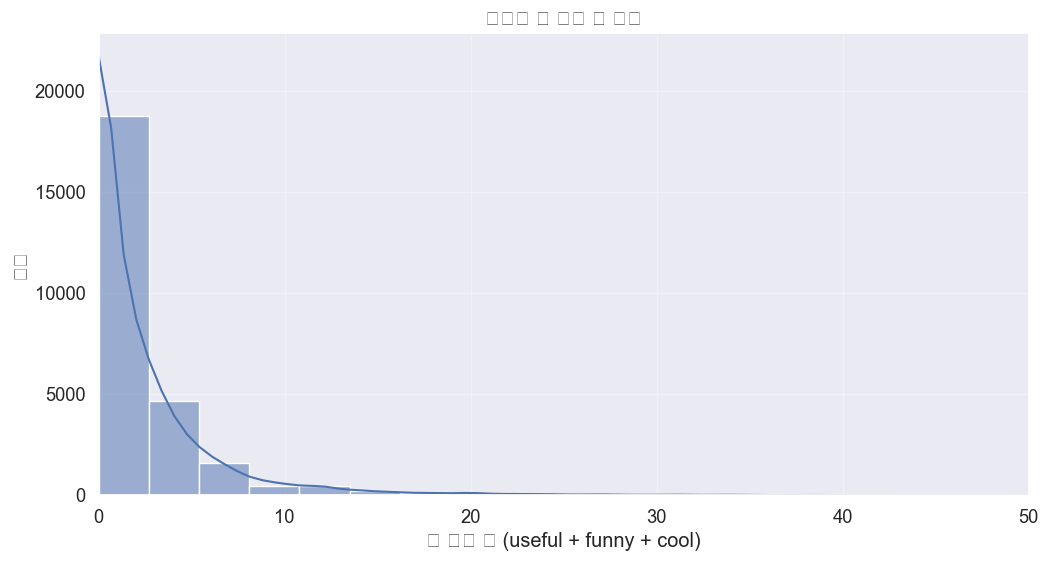

c:\Users\PYJ\anaconda3\envs\lab\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PYJ\anaconda3\envs\lab\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PYJ\anaconda3\envs\lab\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53581 (\N{HANGUL SYLLABLE TEG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PYJ\anaconda3\envs\lab\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PYJ\anaconda3\envs\lab\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) Arial.
  fig.canvas.print_figure(by

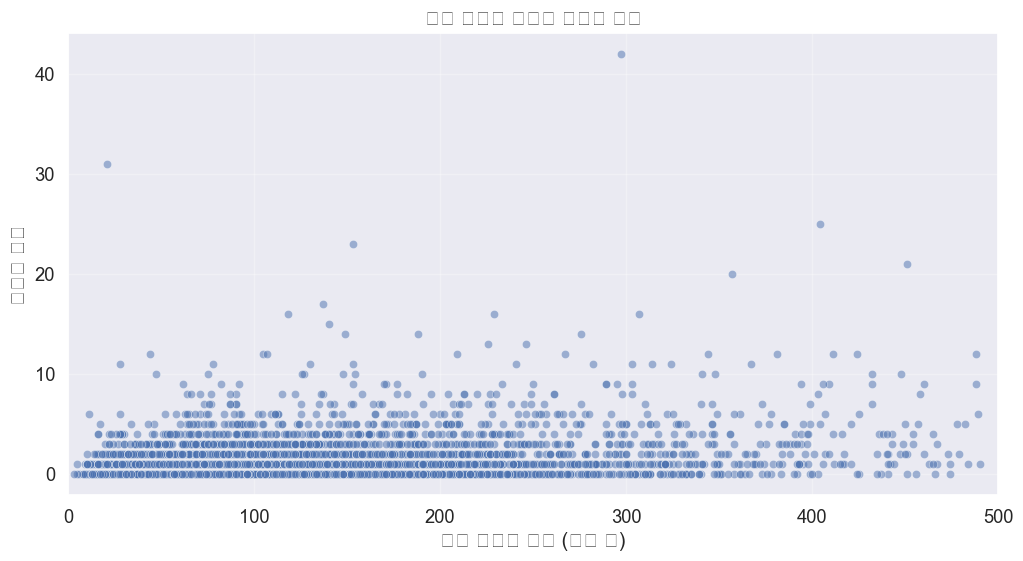

c:\Users\PYJ\anaconda3\envs\lab\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PYJ\anaconda3\envs\lab\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48624 (\N{HANGUL SYLLABLE BYU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PYJ\anaconda3\envs\lab\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53581 (\N{HANGUL SYLLABLE TEG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PYJ\anaconda3\envs\lab\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\PYJ\anaconda3\envs\lab\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) Arial.
  fig.canvas.print_figure(by

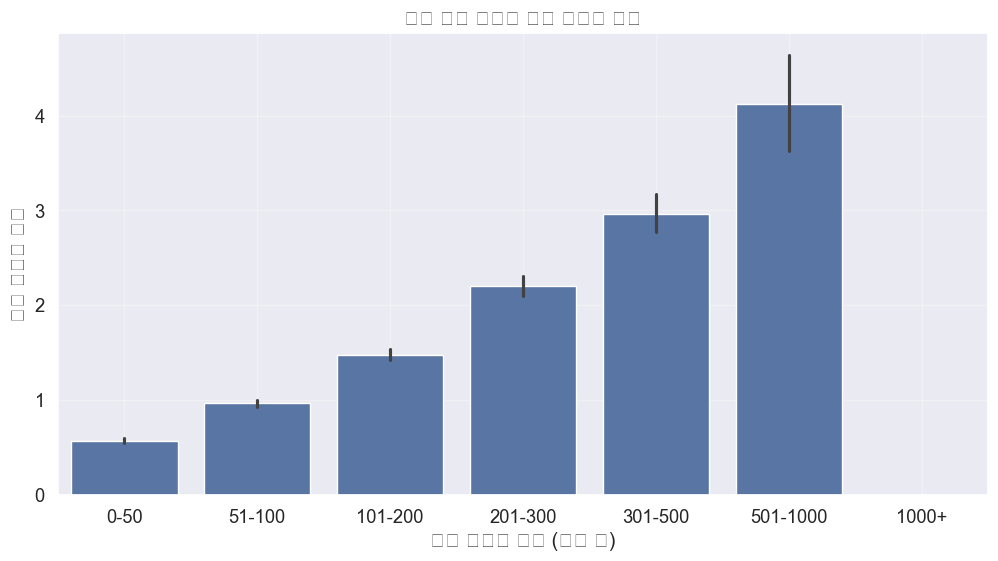

In [11]:
## 4. 리뷰 품질 지표 분석

# 리뷰 유용성 지표 (useful, funny, cool) 분석
review_reaction_cols = ['useful', 'funny', 'cool']

if all(col in interaction_df.columns for col in review_reaction_cols):
    print("\n=== 리뷰 반응 통계 ===")
    for col in review_reaction_cols:
        print(f"\n{col.capitalize()} 통계:")
        print(interaction_df[col].describe())
    
    # 리뷰 반응 합계 계산
    interaction_df['total_reactions'] = interaction_df[review_reaction_cols].sum(axis=1)
    
    # 리뷰 반응 분포 시각화
    plt.figure(figsize=(12, 6))
    sns.histplot(interaction_df['total_reactions'], bins=50, kde=True)
    plt.title('리뷰별 총 반응 수 분포')
    plt.xlabel('총 반응 수 (useful + funny + cool)')
    plt.ylabel('빈도')
    plt.xlim(0, 50)  # 가독성을 위해 x축 제한
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("리뷰 반응 컬럼(useful, funny, cool)이 데이터에 없습니다.")

# 리뷰 텍스트 길이와 유용성 관계 분석
if 'text_length' in interaction_df.columns and 'useful' in interaction_df.columns:
    # 리뷰 길이와 유용성 점수의 산점도 (샘플링)
    plt.figure(figsize=(12, 6))
    sample_size = min(5000, len(interaction_df))
    sample_indices = np.random.choice(len(interaction_df), sample_size, replace=False)
    
    sns.scatterplot(
        x='text_length', 
        y='useful', 
        data=interaction_df.iloc[sample_indices],
        alpha=0.5
    )
    plt.title('리뷰 길이와 유용성 점수의 관계')
    plt.xlabel('리뷰 텍스트 길이 (단어 수)')
    plt.ylabel('유용성 점수')
    plt.xlim(0, 500)  # 가독성을 위해 x축 제한
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # 리뷰 길이 구간별 평균 유용성 점수
    interaction_df['length_bin'] = pd.cut(
        interaction_df['text_length'], 
        bins=[0, 50, 100, 200, 300, 500, 1000, np.inf], 
        labels=['0-50', '51-100', '101-200', '201-300', '301-500', '501-1000', '1000+']
    )
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='length_bin', y='useful', data=interaction_df)
    plt.title('리뷰 길이 구간별 평균 유용성 점수')
    plt.xlabel('리뷰 텍스트 길이 (단어 수)')
    plt.ylabel('평균 유용성 점수')
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("리뷰 텍스트 길이 또는 유용성 점수 컬럼이 데이터에 없습니다.")


In [12]:
print(interaction_df.head())

    user_idx  item_idx  rating   timestamp               review_id  \
13      9395      3731     4.0  1255550234  8JFGBuHMoiNDyfcxuWNtrA   
14       377      2256     4.0  1319735525  UBp0zWyH60Hmw6Fsasei7w   
17      8324      5304     4.0  1407699703  LnGZB0fjfgeVDVz5IHuEVA   
19      9701      2260     5.0  1415806227  Xs8Z8lmKkosqW5mw_sVAoA   
20       152      5296     5.0  1255463391  vBK79c3_1Ff_oqkh5VpfGg   

                                                 text  useful  funny  cool  \
13  Good food--loved the gnocchi with marinara\nth...       0      0     0   
14  The bun makes the Sonoran Dog. It's like a snu...       0      2     0   
17  The hubby and I have been here on multiple occ...       1      0     0   
19  My absolute favorite cafe in the city. Their b...       0      0     0   
20  HOLY SMOKES!\n\nactual pumpkin pie mixed in wi...       2      5     2   

                  date year_month  \
13 2009-10-14 19:57:14    2009-10   
14 2011-10-27 17:12:05    2011-10   

In [15]:
## 5. 사용자별 리뷰 품질 집계

def calculate_user_review_quality(interaction_df, user_processed):
    """
    사용자별 리뷰 품질 지표 계산
    
    Args:
        interaction_df (pd.DataFrame): 상호작용 데이터프레임
        user_processed (pd.DataFrame): 사용자 데이터프레임
        
    Returns:
        pd.DataFrame: 리뷰 품질 지표가 포함된 사용자 데이터프레임
    """
    user_df = user_processed.copy()
    
    # 필요한 컬럼 확인
    required_cols = ['user_idx', 'useful', 'funny', 'cool', 'text_length']
    missing_cols = [col for col in required_cols if col not in interaction_df.columns]
    
    if missing_cols:
        print(f"누락된 컬럼이 있습니다: {missing_cols}")
        print("기본 신뢰도 점수를 사용합니다.")
        return user_df
    
    # 사용자별 리뷰 품질 지표 집계
    user_review_quality = interaction_df.groupby('user_idx').agg(
        avg_useful=('useful', 'mean'),
        avg_funny=('funny', 'mean'),
        avg_cool=('cool', 'mean'),
        avg_text_length=('text_length', 'mean'),
        max_useful=('useful', 'max'),
        max_funny=('funny', 'max'),
        max_cool=('cool', 'max'),
        total_useful=('useful', 'sum'),
        total_funny=('funny', 'sum'),
        total_cool=('cool', 'sum'),
        interaction_count = ('user_idx', 'count')
    ).reset_index()
    
    # 사용자 데이터프레임과 병합
    user_df = user_df.merge(user_review_quality, on='user_idx', how='left')
    
    # 결측치 채우기
    cols_to_fill = user_review_quality.columns.drop('user_idx')
    user_df[cols_to_fill] = user_df[cols_to_fill].fillna(0)
    
    return user_df

# 사용자별 리뷰 품질 집계
user_review_quality_df = calculate_user_review_quality(interaction_df, user_processed)
print(f"리뷰 품질 지표가 추가된 사용자 데이터프레임 크기: {user_review_quality_df.shape}")
print(user_review_quality_df.head())

리뷰 품질 지표가 추가된 사용자 데이터프레임 크기: (430, 31)
   user_idx  review_count       yelping_since  fans  average_stars  \
0         0          2288 2005-12-30 13:47:19   345           3.69   
1         1           157 2010-09-21 18:14:11     5           3.63   
2         4           645 2008-02-11 19:45:49    70           3.89   
3         7          1670 2010-04-11 01:43:25    35           3.65   
4         8           731 2012-05-06 16:17:55   136           3.95   

   compliment_hot  compliment_more  compliment_profile  compliment_cute  \
0             693               63                  46               47   
1               0                2                   0                0   
2             103               34                  19                4   
3               5                1                   2                1   
4             112               21                  16                7   

   compliment_list  ...  avg_funny  avg_cool  avg_text_length  max_useful  \
0           


=== 신뢰도 점수 통계 ===

간단한 신뢰도 점수:
count      430.000000
mean       891.418605
std       2255.326868
min          4.000000
25%        126.500000
50%        391.500000
75%        834.250000
max      35717.500000
Name: trust_score_simple, dtype: float64

고급 신뢰도 점수:
count      430.000000
mean       932.333189
std       2272.029595
min         14.696188
25%        150.291772
50%        437.751272
75%        884.272400
max      36027.496610
Name: trust_score_advanced, dtype: float64

정규화된 간단한 신뢰도 점수:
count    430.000000
mean       0.084766
std        0.150185
min        0.000000
25%        0.012847
50%        0.040637
75%        0.087068
max        1.000000
Name: trust_score_simple_normalized, dtype: float64

정규화된 고급 신뢰도 점수:
count    430.000000
mean       0.087369
std        0.150427
min        0.000000
25%        0.014139
50%        0.044114
75%        0.090675
max        1.000000
Name: trust_score_advanced_normalized, dtype: float64


C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\2913623687.py:134: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\2913623687.py:134: UserWarning: Glyph 47280 (\N{HANGUL SYLLABLE ROE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\2913623687.py:134: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\2913623687.py:134: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\2913623687.py:134: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\2913623687.py:134: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) Arial.
  plt.tight_layout()


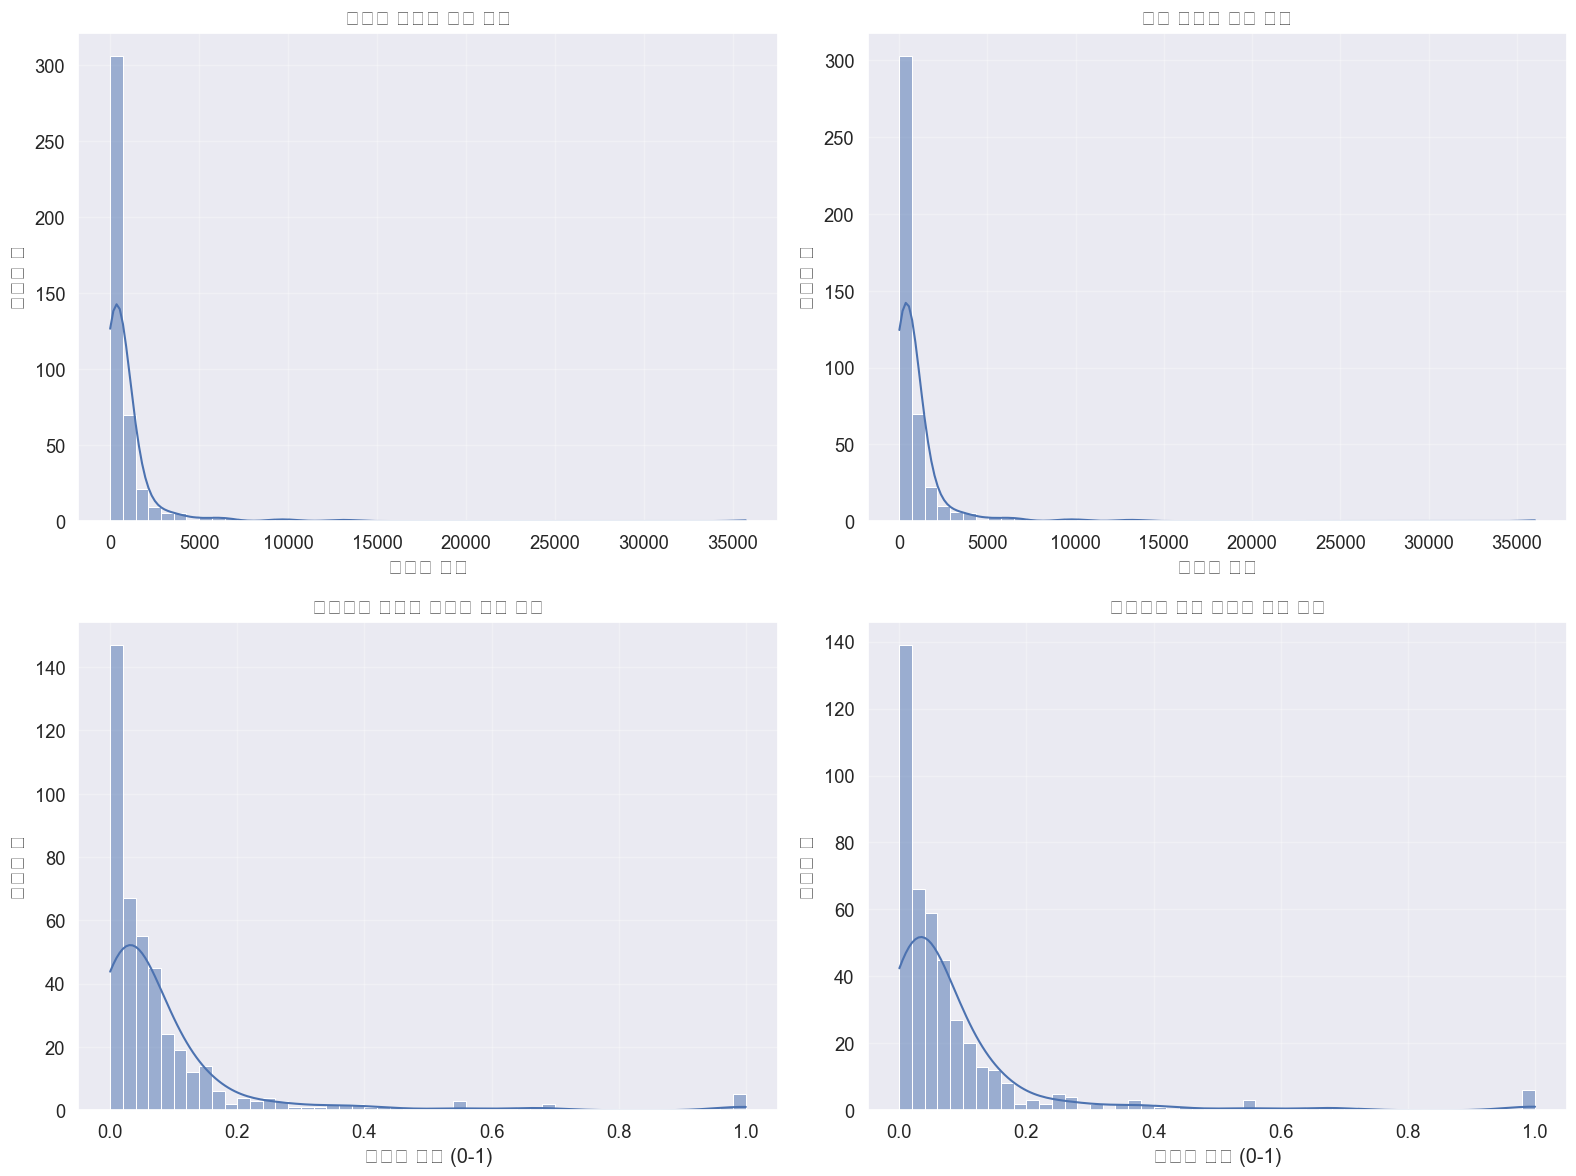

In [16]:
## 6. 신뢰도 점수 계산 함수 구현

def calculate_trust_score_simple(user_df):
    """
    간단한 사용자 신뢰도 점수 계산 (기본 버전)
    
    Args:
        user_df (pd.DataFrame): 사용자 데이터프레임
        
    Returns:
        pd.DataFrame: 신뢰도 점수가 추가된 사용자 데이터프레임
    """
    df = user_df.copy()
    
    # 간단한 신뢰도 점수: 팬 수 + 리뷰 수 + 총 컴플리먼트
    if 'fans' in df.columns and 'review_count' in df.columns and 'total_compliments' in df.columns:
        df['trust_score_simple'] = df['fans'] * 2 + df['review_count'] + df['total_compliments'] * 0.5
    else:
        print("필요한 컬럼(fans, review_count, total_compliments)이 없습니다.")
        df['trust_score_simple'] = 0
    
    return df

def calculate_trust_score_advanced(user_df):
    """
    고급 사용자 신뢰도 점수 계산 (리뷰 품질 지표 포함)
    
    Args:
        user_df (pd.DataFrame): 사용자 데이터프레임
        
    Returns:
        pd.DataFrame: 신뢰도 점수가 추가된 사용자 데이터프레임
    """
    df = user_df.copy()
    
    # 필요한 컬럼 확인
    required_cols = [
        'fans', 'review_count', 'total_compliments', 
        'total_useful', 'total_funny', 'total_cool',
        'avg_text_length', 'activity_intensity'
    ]
    missing_cols = [col for col in required_cols if col not in df.columns]
    
    if missing_cols:
        print(f"누락된 컬럼이 있습니다: {missing_cols}")
        print("간단한 신뢰도 점수를 대신 사용합니다.")
        return calculate_trust_score_simple(df)
    
    # 고급 신뢰도 점수 계산 (가중치 사용)
    df['trust_score_advanced'] = (
        df['fans'] * 2 +                   # 팬 수 (가중치 2)
        df['review_count'] * 1 +           # 리뷰 수 (가중치 1)
        df['total_compliments'] * 0.5 +    # 총 컴플리먼트 (가중치 0.5)
        df['total_useful'] * 3 +           # 총 유용성 점수 (가중치 3)
        df['total_funny'] * 1 +            # 총 재미 점수 (가중치 1)
        df['total_cool'] * 2 +             # 총 쿨 점수 (가중치 2)
        df['avg_text_length'] * 0.1 +      # 평균 리뷰 길이 (가중치 0.1)
        df['activity_intensity'] * 100     # 활동 강도 (가중치 100)
    )
    
    return df

def normalize_trust_scores(user_df, score_cols):
    """
    신뢰도 점수 정규화 (0-1 범위)
    
    Args:
        user_df (pd.DataFrame): 사용자 데이터프레임
        score_cols (list): 정규화할 점수 컬럼 리스트
        
    Returns:
        pd.DataFrame: 정규화된 점수가 추가된 사용자 데이터프레임
    """
    df = user_df.copy()
    
    for col in score_cols:
        if col in df.columns:
            # 이상치의 영향을 줄이기 위해 99 퍼센타일로 상한 설정
            upper_bound = df[col].quantile(0.99)
            capped_scores = df[col].clip(upper=upper_bound)
            
            # Min-Max 정규화
            scaler = MinMaxScaler()
            df[f'{col}_normalized'] = scaler.fit_transform(capped_scores.values.reshape(-1, 1))
    
    return df

# 신뢰도 점수 계산
user_trust_df = calculate_trust_score_simple(user_review_quality_df)
user_trust_df = calculate_trust_score_advanced(user_trust_df)
user_trust_df = normalize_trust_scores(user_trust_df, ['trust_score_simple', 'trust_score_advanced'])

print("\n=== 신뢰도 점수 통계 ===")
print("\n간단한 신뢰도 점수:")
print(user_trust_df['trust_score_simple'].describe())
print("\n고급 신뢰도 점수:")
print(user_trust_df['trust_score_advanced'].describe())
print("\n정규화된 간단한 신뢰도 점수:")
print(user_trust_df['trust_score_simple_normalized'].describe())
print("\n정규화된 고급 신뢰도 점수:")
print(user_trust_df['trust_score_advanced_normalized'].describe())

# 신뢰도 점수 분포 시각화
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 간단한 신뢰도 점수 분포
sns.histplot(user_trust_df['trust_score_simple'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('간단한 신뢰도 점수 분포')
axes[0, 0].set_xlabel('신뢰도 점수')
axes[0, 0].set_ylabel('사용자 수')
axes[0, 0].grid(True, alpha=0.3)

# 고급 신뢰도 점수 분포
sns.histplot(user_trust_df['trust_score_advanced'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('고급 신뢰도 점수 분포')
axes[0, 1].set_xlabel('신뢰도 점수')
axes[0, 1].set_ylabel('사용자 수')
axes[0, 1].grid(True, alpha=0.3)

# 정규화된 간단한 신뢰도 점수 분포
sns.histplot(user_trust_df['trust_score_simple_normalized'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('정규화된 간단한 신뢰도 점수 분포')
axes[1, 0].set_xlabel('신뢰도 점수 (0-1)')
axes[1, 0].set_ylabel('사용자 수')
axes[1, 0].grid(True, alpha=0.3)

# 정규화된 고급 신뢰도 점수 분포
sns.histplot(user_trust_df['trust_score_advanced_normalized'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('정규화된 고급 신뢰도 점수 분포')
axes[1, 1].set_xlabel('신뢰도 점수 (0-1)')
axes[1, 1].set_ylabel('사용자 수')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1448525217.py:25: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1448525217.py:25: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1448525217.py:25: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1448525217.py:25: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1448525217.py:25: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1448525217.py:25: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) Arial.
  plt.tight_layout()
C:

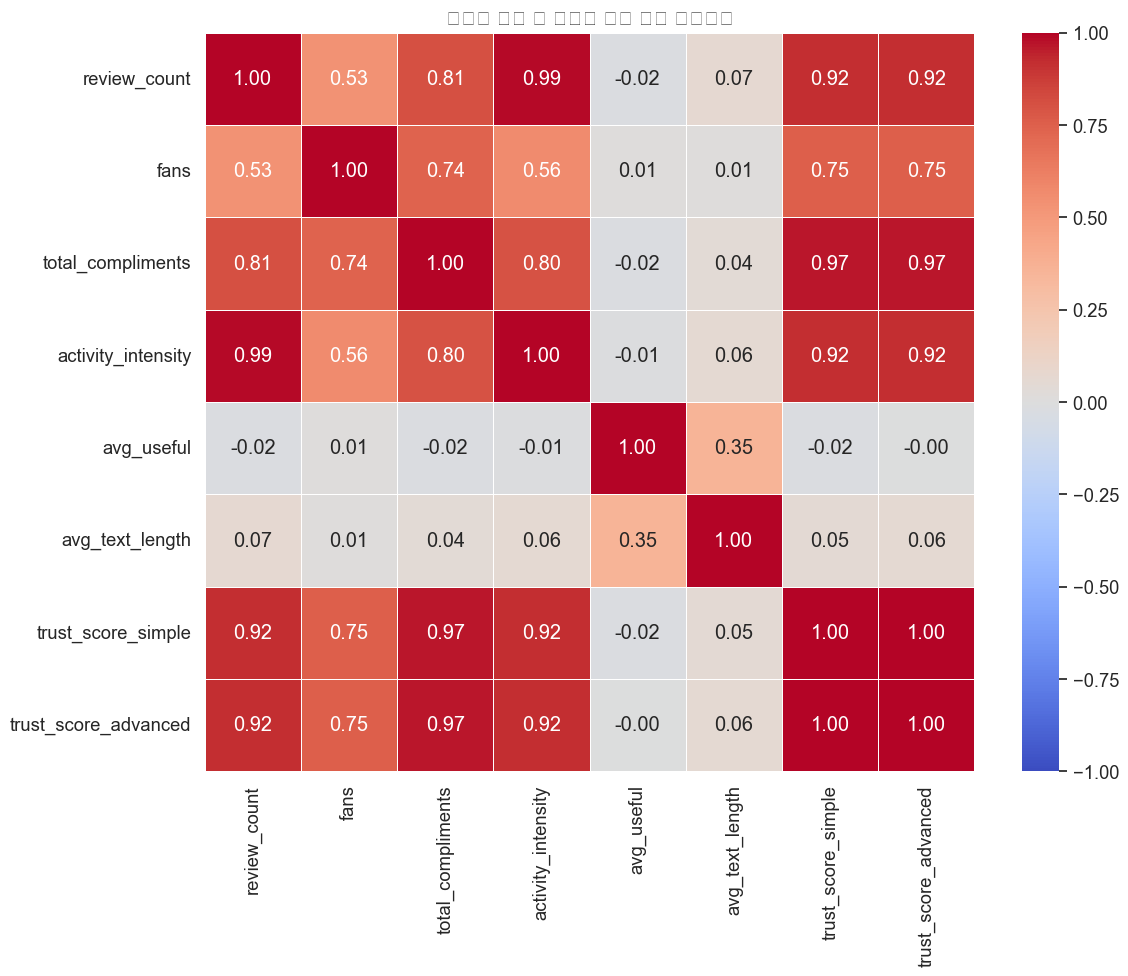

C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1448525217.py:74: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trust_group_means = user_trust_df.groupby('trust_group').agg({



=== 신뢰도 그룹별 사용자 수 ===
trust_group
G1    108
G2    107
G3    107
G4    108
Name: count, dtype: int64

=== 신뢰도 그룹별 특성 평균 ===
             review_count    fans  total_compliments  activity_intensity  \
trust_group                                                                
G1                  54.61    1.89               8.89                0.01   
G2                 191.02   11.35              53.13                0.04   
G3                 430.37   30.28             172.99                0.08   
G4                1345.63  183.88            1925.62                0.25   

             avg_useful  avg_text_length  trust_score_advanced  
trust_group                                                     
G1                 1.41           125.61                 86.39  
G2                 1.75           142.90                272.39  
G3                 1.96           123.83                623.61  
G4                 1.91           141.79               2737.97  


C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1448525217.py:103: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1448525217.py:103: UserWarning: Glyph 47280 (\N{HANGUL SYLLABLE ROE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1448525217.py:103: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1448525217.py:103: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1448525217.py:103: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1448525217.py:103: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) Arial.
  plt.tight_layou

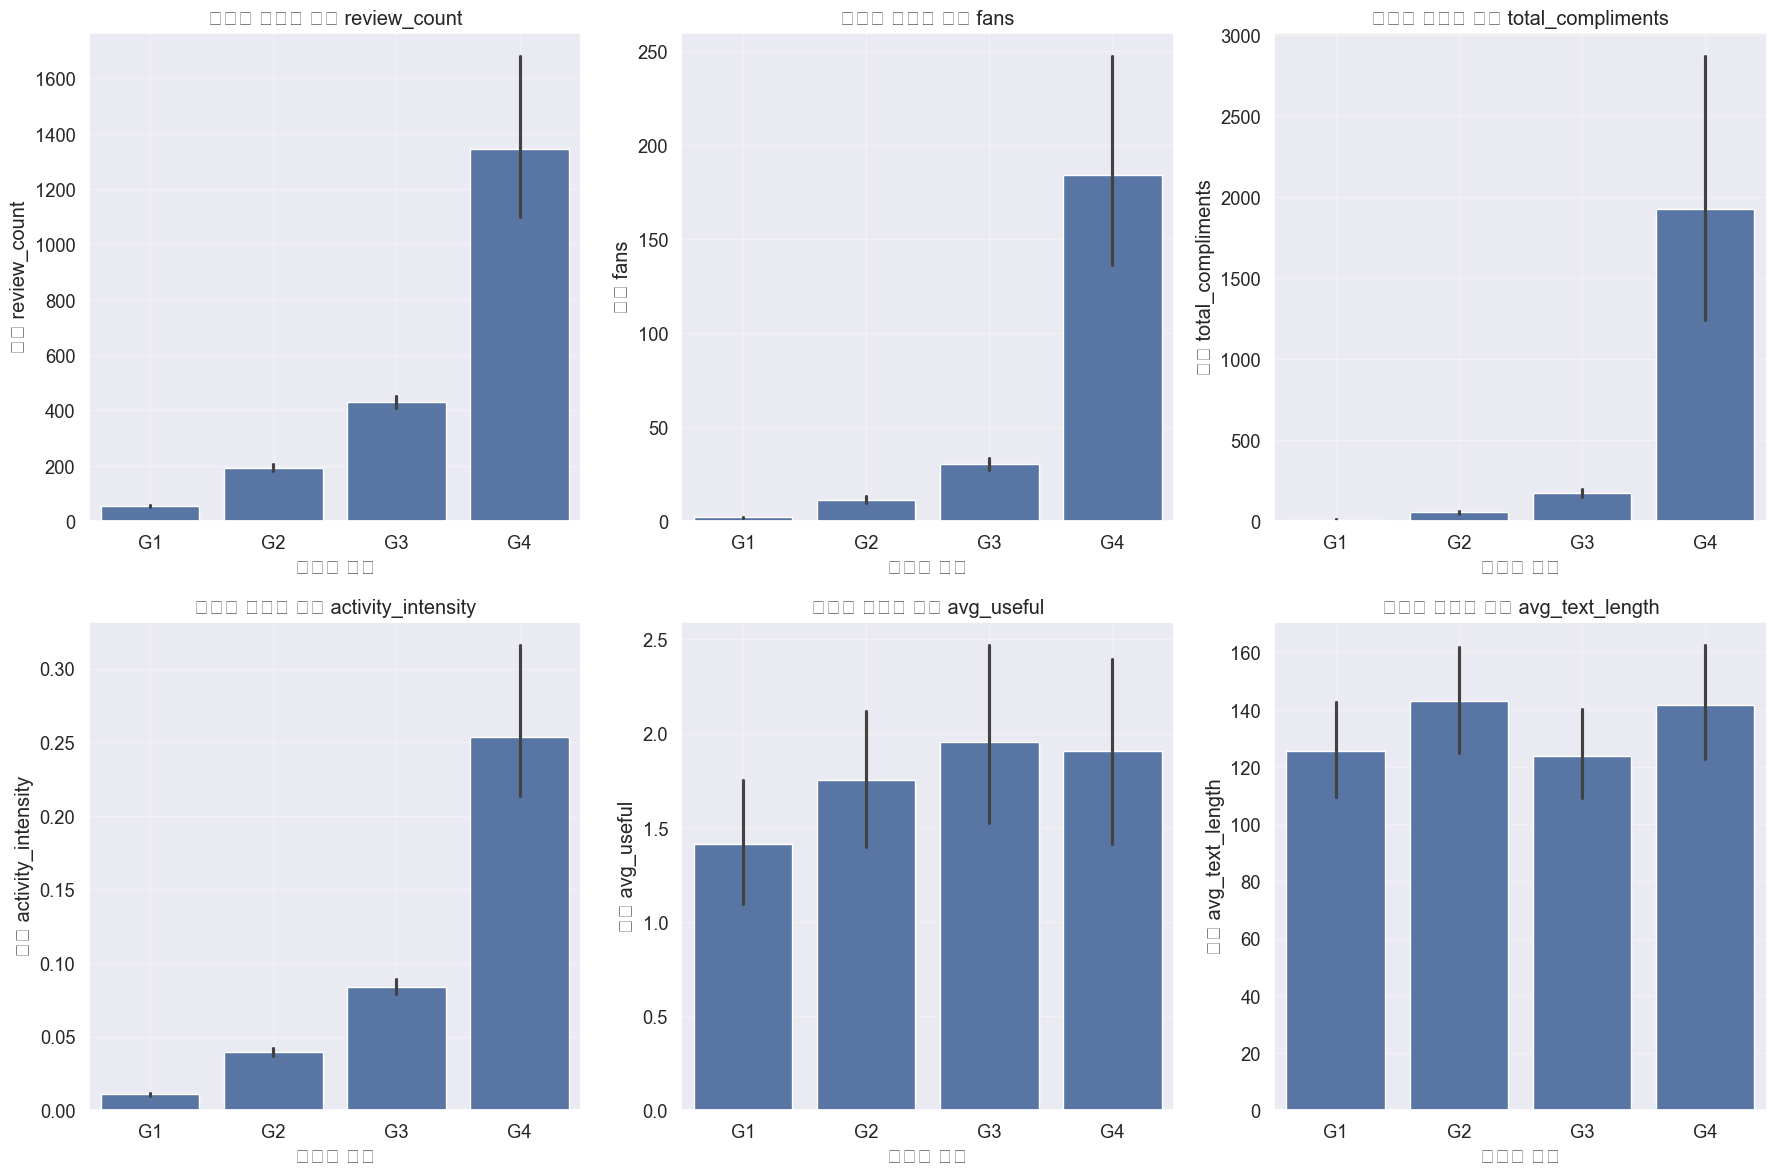

In [17]:
## 7. 신뢰도 점수와 다른 지표 간의 상관관계 분석

# 상관관계 분석을 위한 컬럼 선택
correlation_cols = [
    'review_count', 'fans', 'total_compliments', 
    'activity_intensity', 'avg_useful', 'avg_text_length',
    'trust_score_simple', 'trust_score_advanced'
]

# 상관관계 행렬 계산
correlation_matrix = user_trust_df[correlation_cols].corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1,
    linewidths=0.5
)
plt.title('사용자 특성 및 신뢰도 점수 간의 상관관계')
plt.tight_layout()
plt.show()

## 8. 신뢰도 점수별 사용자 그룹화 및 분석

def categorize_users_by_trust(user_df, score_col, n_groups=4):
    """
    신뢰도 점수를 기반으로 사용자 그룹화
    
    Args:
        user_df (pd.DataFrame): 사용자 데이터프레임
        score_col (str): 사용할 점수 컬럼
        n_groups (int): 그룹 수
        
    Returns:
        pd.DataFrame: 그룹이 추가된 사용자 데이터프레임
    """
    df = user_df.copy()
    
    # 그룹 경계 계산
    quantiles = np.linspace(0, 1, n_groups + 1)
    boundaries = [df[score_col].quantile(q) for q in quantiles]
    
    # 그룹 레이블 생성
    labels = [f'G{i+1}' for i in range(n_groups)]
    
    # 사용자 그룹화
    df['trust_group'] = pd.cut(
        df[score_col], 
        bins=boundaries, 
        labels=labels, 
        include_lowest=True
    )
    
    return df

# 정규화된 고급 신뢰도 점수로 사용자 그룹화
user_trust_df = categorize_users_by_trust(
    user_trust_df, 
    'trust_score_advanced_normalized', 
    n_groups=4
)

# 그룹별 사용자 수
trust_group_counts = user_trust_df['trust_group'].value_counts().sort_index()
print("\n=== 신뢰도 그룹별 사용자 수 ===")
print(trust_group_counts)

# 그룹별 특성 평균
trust_group_means = user_trust_df.groupby('trust_group').agg({
    'review_count': 'mean',
    'fans': 'mean',
    'total_compliments': 'mean',
    'activity_intensity': 'mean',
    'avg_useful': 'mean',
    'avg_text_length': 'mean',
    'trust_score_advanced': 'mean'
}).round(2)

print("\n=== 신뢰도 그룹별 특성 평균 ===")
print(trust_group_means)

# 그룹별 특성 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

metrics = [
    'review_count', 'fans', 'total_compliments', 
    'activity_intensity', 'avg_useful', 'avg_text_length'
]

for i, metric in enumerate(metrics):
    sns.barplot(x='trust_group', y=metric, data=user_trust_df, ax=axes[i])
    axes[i].set_title(f'신뢰도 그룹별 평균 {metric}')
    axes[i].set_xlabel('신뢰도 그룹')
    axes[i].set_ylabel(f'평균 {metric}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
## 9. 최종 신뢰도 점수 선택 및 저장

# 최종 신뢰도 점수 선택 (정규화된 고급 신뢰도 점수)
user_trust_df['final_trust_score'] = user_trust_df['trust_score_advanced_normalized']

# 필요한 컬럼만 선택하여 최종 데이터프레임 생성
final_trust_df = user_trust_df[['user_idx', 'final_trust_score', 'trust_group']].copy()

print("\n=== 최종 신뢰도 점수 통계 ===")
print(final_trust_df['final_trust_score'].describe())
print(f"\n총 사용자 수: {len(final_trust_df):,}")

# 최종 신뢰도 점수 저장
with open(os.path.join(TRUST_DIR, 'user_trust_scores.pkl'), 'wb') as f:
    pickle.dump(final_trust_df, f)
print(f"\n최종 신뢰도 점수 저장 완료: {os.path.join(TRUST_DIR, 'user_trust_scores.pkl')}")

# 전체 신뢰도 데이터프레임 저장 (참조용)
with open(os.path.join(TRUST_DIR, 'user_trust_full.pkl'), 'wb') as f:
    pickle.dump(user_trust_df, f)
print(f"전체 신뢰도 데이터 저장 완료: {os.path.join(TRUST_DIR, 'user_trust_full.pkl')}")



=== 최종 신뢰도 점수 통계 ===
count    430.000000
mean       0.087369
std        0.150427
min        0.000000
25%        0.014139
50%        0.044114
75%        0.090675
max        1.000000
Name: final_trust_score, dtype: float64

총 사용자 수: 430

최종 신뢰도 점수 저장 완료: ./data/trust\user_trust_scores.pkl
전체 신뢰도 데이터 저장 완료: ./data/trust\user_trust_full.pkl


C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1900537767.py:64: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1900537767.py:64: UserWarning: Glyph 47280 (\N{HANGUL SYLLABLE ROE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1900537767.py:64: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1900537767.py:64: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1900537767.py:64: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1900537767.py:64: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Use

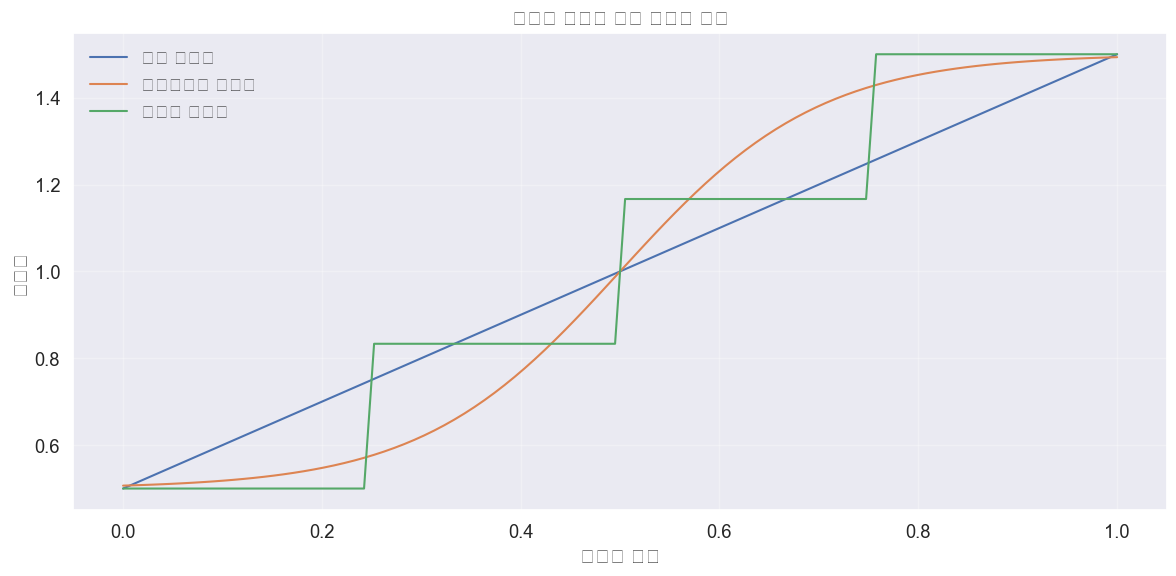

C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1900537767.py:93: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1900537767.py:93: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1900537767.py:93: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1900537767.py:93: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1900537767.py:93: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\PYJ\AppData\Local\Temp\ipykernel_10172\1900537767.py:93: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Use

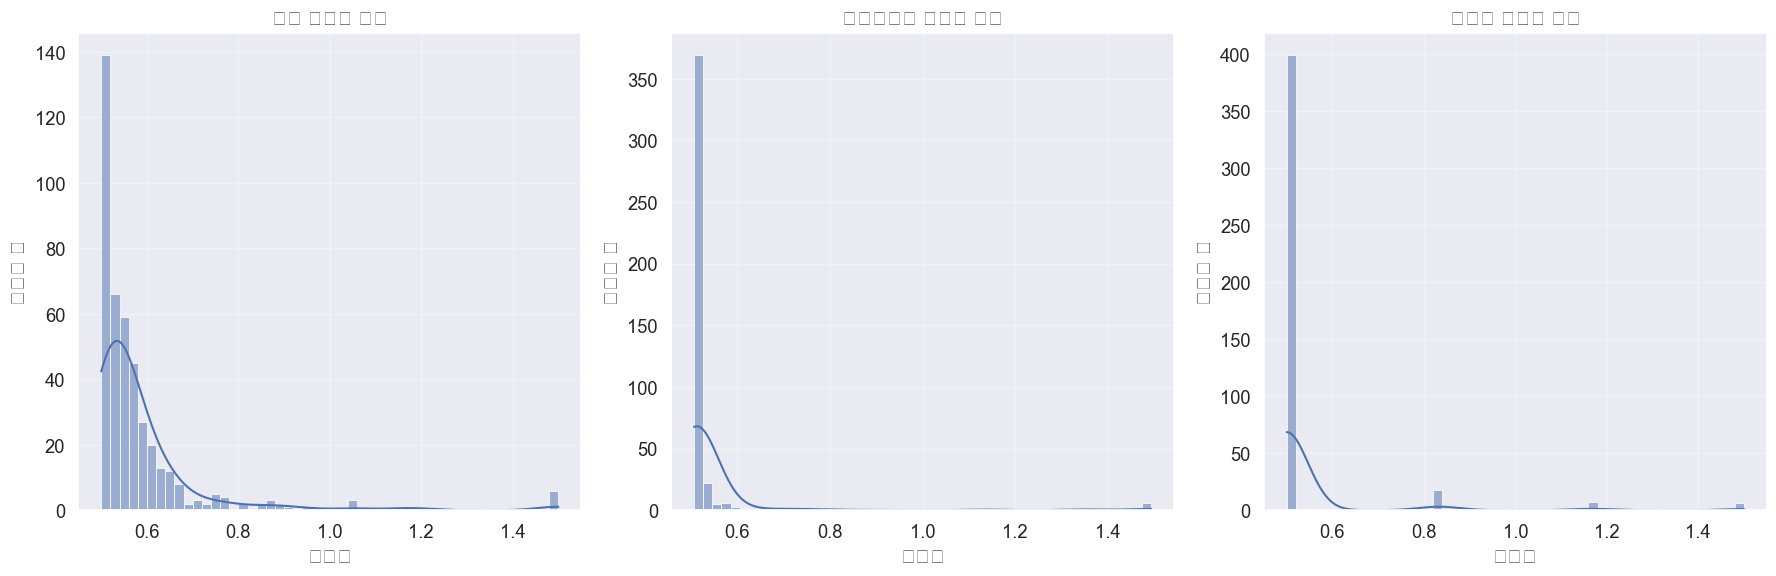

In [19]:
## 10. 신뢰도 점수를 활용한 가중치 함수 구현

def trust_weight_linear(trust_score):
    """
    선형 신뢰도 가중치 함수
    
    Args:
        trust_score (float): 신뢰도 점수 (0-1)
        
    Returns:
        float: 가중치 (0.5-1.5)
    """
    # 신뢰도 점수에 따라 0.5에서 1.5 사이의 가중치 반환
    return 0.5 + trust_score * 1.0

def trust_weight_sigmoid(trust_score, k=10):
    """
    시그모이드 신뢰도 가중치 함수
    
    Args:
        trust_score (float): 신뢰도 점수 (0-1)
        k (float): 시그모이드 기울기
        
    Returns:
        float: 가중치 (0.5-1.5)
    """
    # 시그모이드 함수를 사용하여 0.5에서 1.5 사이의 가중치 반환
    x = (trust_score - 0.5) * k
    sigmoid = 1 / (1 + np.exp(-x))
    return 0.5 + sigmoid * 1.0

def trust_weight_step(trust_score, steps=4):
    """
    계단식 신뢰도 가중치 함수
    
    Args:
        trust_score (float): 신뢰도 점수 (0-1)
        steps (int): 계단 수
        
    Returns:
        float: 가중치 (0.5-1.5)
    """
    # 계단식 함수를 사용하여 0.5에서 1.5 사이의 가중치 반환
    step_size = 1.0 / steps
    step = int(trust_score / step_size)
    step = min(step, steps - 1)  # 최대 계단 수 제한
    return 0.5 + step * (1.0 / (steps - 1))

# 가중치 함수 시각화
trust_scores = np.linspace(0, 1, 100)
linear_weights = [trust_weight_linear(score) for score in trust_scores]
sigmoid_weights = [trust_weight_sigmoid(score) for score in trust_scores]
step_weights = [trust_weight_step(score) for score in trust_scores]

plt.figure(figsize=(12, 6))
plt.plot(trust_scores, linear_weights, label='선형 가중치')
plt.plot(trust_scores, sigmoid_weights, label='시그모이드 가중치')
plt.plot(trust_scores, step_weights, label='계단식 가중치')
plt.title('신뢰도 점수에 따른 가중치 함수')
plt.xlabel('신뢰도 점수')
plt.ylabel('가중치')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# 실제 사용자 데이터로 가중치 분포 확인
user_trust_df['linear_weight'] = user_trust_df['final_trust_score'].apply(trust_weight_linear)
user_trust_df['sigmoid_weight'] = user_trust_df['final_trust_score'].apply(trust_weight_sigmoid)
user_trust_df['step_weight'] = user_trust_df['final_trust_score'].apply(trust_weight_step)

# 가중치 분포 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.histplot(user_trust_df['linear_weight'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('선형 가중치 분포')
axes[0].set_xlabel('가중치')
axes[0].set_ylabel('사용자 수')
axes[0].grid(True, alpha=0.3)

sns.histplot(user_trust_df['sigmoid_weight'], bins=50, kde=True, ax=axes[1])
axes[1].set_title('시그모이드 가중치 분포')
axes[1].set_xlabel('가중치')
axes[1].set_ylabel('사용자 수')
axes[1].grid(True, alpha=0.3)

sns.histplot(user_trust_df['step_weight'], bins=50, kde=True, ax=axes[2])
axes[2].set_title('계단식 가중치 분포')
axes[2].set_xlabel('가중치')
axes[2].set_ylabel('사용자 수')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
## 11. 가중치 함수 저장

# 가중치 함수 저장
weight_functions = {
    'linear': trust_weight_linear,
    'sigmoid': trust_weight_sigmoid,
    'step': trust_weight_step
}

with open(os.path.join(TRUST_DIR, 'trust_weight_functions.pkl'), 'wb') as f:
    pickle.dump(weight_functions, f)
print(f"가중치 함수 저장 완료: {os.path.join(TRUST_DIR, 'trust_weight_functions.pkl')}")

# 최종 결과 확인
print("\n=== 신뢰도 점수 및 가중치 요약 ===")
print(f"총 사용자 수: {len(user_trust_df):,}")
print(f"신뢰도 그룹 수: {len(trust_group_counts):,}")
print(f"최종 신뢰도 점수 범위: {user_trust_df['final_trust_score'].min():.4f} - {user_trust_df['final_trust_score'].max():.4f}")
print(f"평균 신뢰도 점수: {user_trust_df['final_trust_score'].mean():.4f}")
print(f"가중치 범위 (선형): {user_trust_df['linear_weight'].min():.4f} - {user_trust_df['linear_weight'].max():.4f}")
print(f"가중치 범위 (시그모이드): {user_trust_df['sigmoid_weight'].min():.4f} - {user_trust_df['sigmoid_weight'].max():.4f}")
print(f"가중치 범위 (계단식): {user_trust_df['step_weight'].min():.4f} - {user_trust_df['step_weight'].max():.4f}")

print("\n사용자 신뢰도 점수 계산 및 분석 완료!")

가중치 함수 저장 완료: ./data/trust\trust_weight_functions.pkl

=== 신뢰도 점수 및 가중치 요약 ===
총 사용자 수: 430
신뢰도 그룹 수: 4
최종 신뢰도 점수 범위: 0.0000 - 1.0000
평균 신뢰도 점수: 0.0874
가중치 범위 (선형): 0.5000 - 1.5000
가중치 범위 (시그모이드): 0.5067 - 1.4933
가중치 범위 (계단식): 0.5000 - 1.5000

사용자 신뢰도 점수 계산 및 분석 완료!
